In [1]:
import numpy as np
import time as time
import matplotlib.pyplot as plt

#La documentación se realizó con la ayuda de la IA DeepSeek

def ParticionFilas(X):
    """
    Función que extrae las filas de una matriz y las devuelve como una lista de vectores.

    Parámetros:
    X (list of list of float/int): Matriz de tamaño mxn (m filas y n columnas).

    Retorna:
    Filas (list of list of float/int): Lista de vectores, donde cada vector representa una fila de la matriz X.

    Notas:
    - Cada fila de la matriz se convierte en un vector independiente.
    - La función es útil para operaciones que requieren manipular filas individuales de una matriz.
    """
    m = len(X)  # Número de filas de la matriz X.
    Filas = []  # Inicializa la lista de filas.

    # Extrae cada fila de la matriz y la agrega a la lista.
    for i in range(m):
        Filas.append(X[i])

    return Filas  # Retorna la lista de filas.

In [2]:
import numpy as np

def SumaMatrices(X, Y):
    """
    SumaMatrices(X, Y) -> numpy.ndarray o str

    Esta función toma dos matrices X e Y como entrada y devuelve la suma elemento por elemento.
    Ambas matrices deben tener las mismas dimensiones. Si las matrices no son del mismo tamaño,
    la función devuelve un mensaje de error.

    Parámetros:
    -----------
    X : list of lists o numpy.ndarray
        La primera matriz a sumar. Debe ser una lista de listas (2D) o un array de numpy (2D).
    Y : list of lists o numpy.ndarray
        La segunda matriz a sumar. Debe ser una lista de listas (2D) o un array de numpy (2D).

    Retorna:
    --------
    numpy.ndarray o str
        - Si las matrices son del mismo tamaño, la función devuelve un array de numpy
          que representa la suma elemento por elemento de las dos matrices.
        - Si las matrices no son del mismo tamaño, la función devuelve una cadena
          indicando que las matrices deben ser del mismo tamaño.

    Ejemplo:
    --------
    >>> X = [[1, 2], [3, 4]]
    >>> Y = [[5, 6], [7, 8]]
    >>> SumaMatrices(X, Y)
    array([[ 6.,  8.],
           [10., 12.]])

    >>> X = [[1, 2], [3, 4]]
    >>> Y = [[5, 6], [7, 8], [9, 10]]
    >>> SumaMatrices(X, Y)
    'Las matrices deben ser del mismo tamaño'
    """
    m = len(X)
    r = len(Y)
    n = len(X[0])
    s = len(Y[0])
    Suma = np.zeros((m, n))
    if m == r and n == s:
        for i in range(m):
            for j in range(n):
                Suma[i][j] = X[i][j] + Y[i][j]
    else:
        return 'Las matrices deben ser del mismo tamaño'
    return Suma

In [3]:
def SumaBloques(X, Y):
    """
    Función que realiza la suma de dos matrices utilizando filas como bloques.

    Parámetros:
    X (list of list of float/int): Primera matriz de tamaño mxn (m filas y n columnas).
    Y (list of list of float/int): Segunda matriz de tamaño rxp (r filas y p columnas).

    Retorna:
    Suma (numpy.ndarray): Matriz resultante de la suma de X e Y, de tamaño mxn.
                          Si las matrices no tienen las mismas dimensiones, retorna un mensaje de error.

    Notas:
    - La función utiliza filas de X e Y como bloques para realizar la suma.
    - La suma de matrices solo es posible si ambas matrices tienen las mismas dimensiones.
    - La matriz resultante tiene las mismas dimensiones que las matrices de entrada.
    """
    m = len(X)  # Número de filas de X.
    n = len(X[0])  # Número de columnas de X.
    r = len(Y)  # Número de filas de Y.
    p = len(Y[0])  # Número de columnas de Y.
    Suma = np.zeros((m, n))  # Inicializa la matriz resultante con ceros.

    # Verifica que las matrices tengan las mismas dimensiones.
    if m == r and n == p:
        # Divide las matrices en bloques (filas de X e Y).
        FilasX = ParticionFilas(X)  # Lista de filas de X (bloques).
        FilasY = ParticionFilas(Y)  # Lista de filas de Y (bloques).

        # Realiza la suma de matrices utilizando bloques.
        for i in range(m):
            Suma[i] = FilasX[i] + FilasY[i]  # Suma las filas correspondientes.
    else:
        # Si las matrices no tienen las mismas dimensiones, retorna un mensaje de error.
        return 'No se puede realizar la suma de matrices si estas no tienen la misma cantidad de elementos'

    return Suma  # Retorna la matriz resultante.

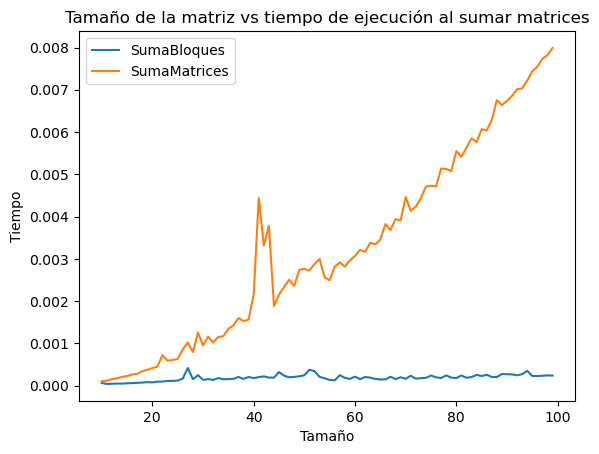

In [7]:
#Celda con el código que compara los métodos para sumar matrices por bloques o usual
Tamaño = np.zeros(90) #Almacena los tamaños de las matrices involucradas en la suma de nxn con n = 10,...100
Tiempo1 = np.zeros(90) #Almacena el tiempo de ejecución de la suma mediante bloques
Tiempo2 = np.zeros(90) #Almacena el tiempo de ejecución de la suma normal
for i in range(90):
    #Crea las matrices involucradas en la suma, A y B, de tamaño nxn, con números uniformemente aleatorios
    A = np.random.uniform(1,1000,(i+10,i+10)) 
    B = np.random.uniform(1,1000,(i+10,i+10))
    Tamaño[i] = i+10 #Llena Tamaño
    #Calcula el tiempo de ejecución del método por bloques
    inicio = time.time()
    SumaBloques(A,B)
    fin = time.time()
    Tiempo1[i] = fin-inicio #Llena Tiempo1
    #Calcula el tiempo de ejecución de la suma normal de matrices
    inicio2 = time.time()
    SumaMatrices(A,B)
    fin2 = time.time()
    Tiempo2[i] = fin2-inicio2 #Llena Tiempo2
#Gráfica el tamaño de las matrices involucradas vs el tiempo de ejecución de la suma para ambos métodos 
plt.plot(Tamaño,Tiempo1,label='SumaBloques')
plt.xlabel('Tamaño')
plt.ylabel('Tiempo')
plt.legend()
plt.plot(Tamaño,Tiempo2,label='SumaMatrices')
plt.legend()
plt.title('Tamaño de la matriz vs tiempo de ejecución al sumar matrices')
plt.show()